    ### PCA - Principal Component Analysis
    Using a dataset of your choice, 
    * select an outcome variable and then 
    * pick four or five other variables 
    * ** (_one to two categorical_ **, 
    * three to four continuous) to act as the basis for features. 
    * Explore the variables using the univariate and 
    * bivariate methods you've learned so far.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
import  sklearn.preprocessing  as preprocessing
from sklearn.decomposition import PCA 
import scipy.stats as spstats
from sklearn.feature_extraction.text import CountVectorizer
import psycopg2

In [3]:
with open('../../postge_local.jsn') as f:
    conf = json.load(f)
    conn_str = "host={} dbname={} user={} password={}".format(conf['host'],conf['database'],conf['user'],conf['passw'])
    # get a connection, if a connect cannot be made an exception will be raised here
conn = psycopg2.connect(conn_str)


In [4]:
cursor = conn.cursor()
df = pd.read_sql("select distinct t.trip_id, t.duration,t.start_date, t.start_station, w.*  \
from trips as t join  weather as w  on w.zip=t.zip_code  and  to_date(w.date,'YYYY-MM-DD')=to_date(t.start_date,'YYYY-MM-DD') \
where  t.start_date like '%2015-09-01%' ", con=conn)

In [5]:
df.head(5)

,trip_id,duration,start_date,start_station,date,maxtemperaturef,meantemperaturef,mintemperaturef,maxdewpointf,meandewpointf,...,meanvisibilitymiles,minvisibilitymiles,maxwindspeedmph,meanwindspeedmph,maxgustspeedmph,precipitationin,cloudcover,events,winddirdegrees,zip
0,913465,746,2015-09-01 00:10:00,San Francisco Caltrain 2 (330 Townsend),2015-09-01,75.0,67.0,58.0,58.0,56.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
1,913468,213,2015-09-01 01:29:00,Clay at Battery,2015-09-01,75.0,67.0,58.0,58.0,56.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
2,913469,574,2015-09-01 01:33:00,Steuart at Market,2015-09-01,75.0,67.0,58.0,58.0,56.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
3,913472,1038,2015-09-01 03:38:00,Townsend at 7th,2015-09-01,75.0,67.0,58.0,58.0,56.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
4,913475,174,2015-09-01 04:58:00,2nd at Folsom,2015-09-01,75.0,67.0,58.0,58.0,56.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107


In [99]:
#just take a look at them .info, head ...
df.describe()

,duration,maxtemperaturef,meantemperaturef,mintemperaturef,maxdewpointf,meandewpointf,mindewpointf,maxhumidity,meanhumidity,minhumidity,...,maxvisibilitymiles,meanvisibilitymiles,minvisibilitymiles,maxwindspeedmph,meanwindspeedmph,maxgustspeedmph,precipitationin,cloudcover,winddirdegrees,zip
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,191.000000,191.000000,191.000000
mean,486.769634,75.785340,67.209424,57.853403,58.397906,56.104712,53.811518,84.670157,67.167539,48.329843,...,10.732984,10.293194,6.753927,21.193717,8.486911,23.685864,0.0,1.780105,260.382199,94159.209424
std,270.961076,1.880928,0.950410,0.845718,1.341168,0.570806,0.685238,1.657868,1.342893,1.645120,...,2.613107,1.045243,1.568497,1.849370,1.239094,6.805242,0.0,0.485389,34.927677,207.098040
min,134.000000,75.000000,66.000000,55.000000,57.000000,55.000000,52.000000,84.000000,65.000000,42.000000,...,10.000000,10.000000,6.000000,16.000000,4.000000,0.000000,0.0,0.000000,245.000000,94041.000000
25%,273.500000,75.000000,67.000000,58.000000,58.000000,56.000000,54.000000,84.000000,67.000000,49.000000,...,10.000000,10.000000,6.000000,22.000000,9.000000,26.000000,0.0,2.000000,245.000000,94107.000000
50%,408.000000,75.000000,67.000000,58.000000,58.000000,56.000000,54.000000,84.000000,67.000000,49.000000,...,10.000000,10.000000,6.000000,22.000000,9.000000,26.000000,0.0,2.000000,245.000000,94107.000000
75%,646.000000,75.000000,67.000000,58.000000,58.000000,56.000000,54.000000,84.000000,67.000000,49.000000,...,10.000000,10.000000,6.000000,22.000000,9.000000,26.000000,0.0,2.000000,245.000000,94107.000000
max,1688.000000,83.000000,71.000000,59.000000,63.000000,58.000000,55.000000,90.000000,74.000000,49.000000,...,20.000000,14.000000,10.000000,22.000000,9.000000,26.000000,0.0,2.000000,344.000000,95113.000000


In [100]:
df.dropna(how='all', inplace=True)

df.tail(5)

,trip_id,duration,start_date,start_station,end_station,subscriber_type,date,maxtemperaturef,meantemperaturef,mintemperaturef,...,meanvisibilitymiles,minvisibilitymiles,maxwindspeedmph,meanwindspeedmph,maxgustspeedmph,precipitationin,cloudcover,events,winddirdegrees,zip
186,915275,223,2015-09-01 21:59:00,San Francisco Caltrain (Townsend at 4th),2nd at Townsend,Subscriber,2015-09-01,75.0,67.0,58.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
187,915279,264,2015-09-01 22:08:00,San Francisco Caltrain (Townsend at 4th),Townsend at 7th,Subscriber,2015-09-01,75.0,67.0,58.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
188,915282,459,2015-09-01 22:12:00,Washington at Kearny,2nd at South Park,Subscriber,2015-09-01,75.0,67.0,58.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
189,915290,360,2015-09-01 23:04:00,Market at Sansome,Powell Street BART,Subscriber,2015-09-01,75.0,67.0,58.0,...,10.0,6.0,22.0,9.0,26.0,0.0,2,,245.0,94107
190,915293,225,2015-09-01 23:45:00,San Antonio Caltrain Station,San Antonio Shopping Center,Subscriber,2015-09-01,78.0,66.0,55.0,...,14.0,10.0,17.0,7.0,0.0,0.0,1,,342.0,94301


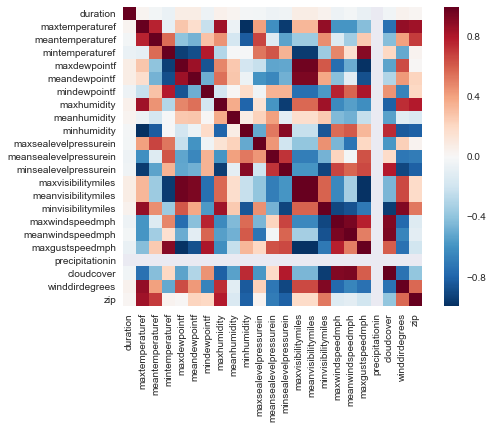

In [101]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\Users\Vadim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Vadim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\Vadim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Vadim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Vadim\Anaco

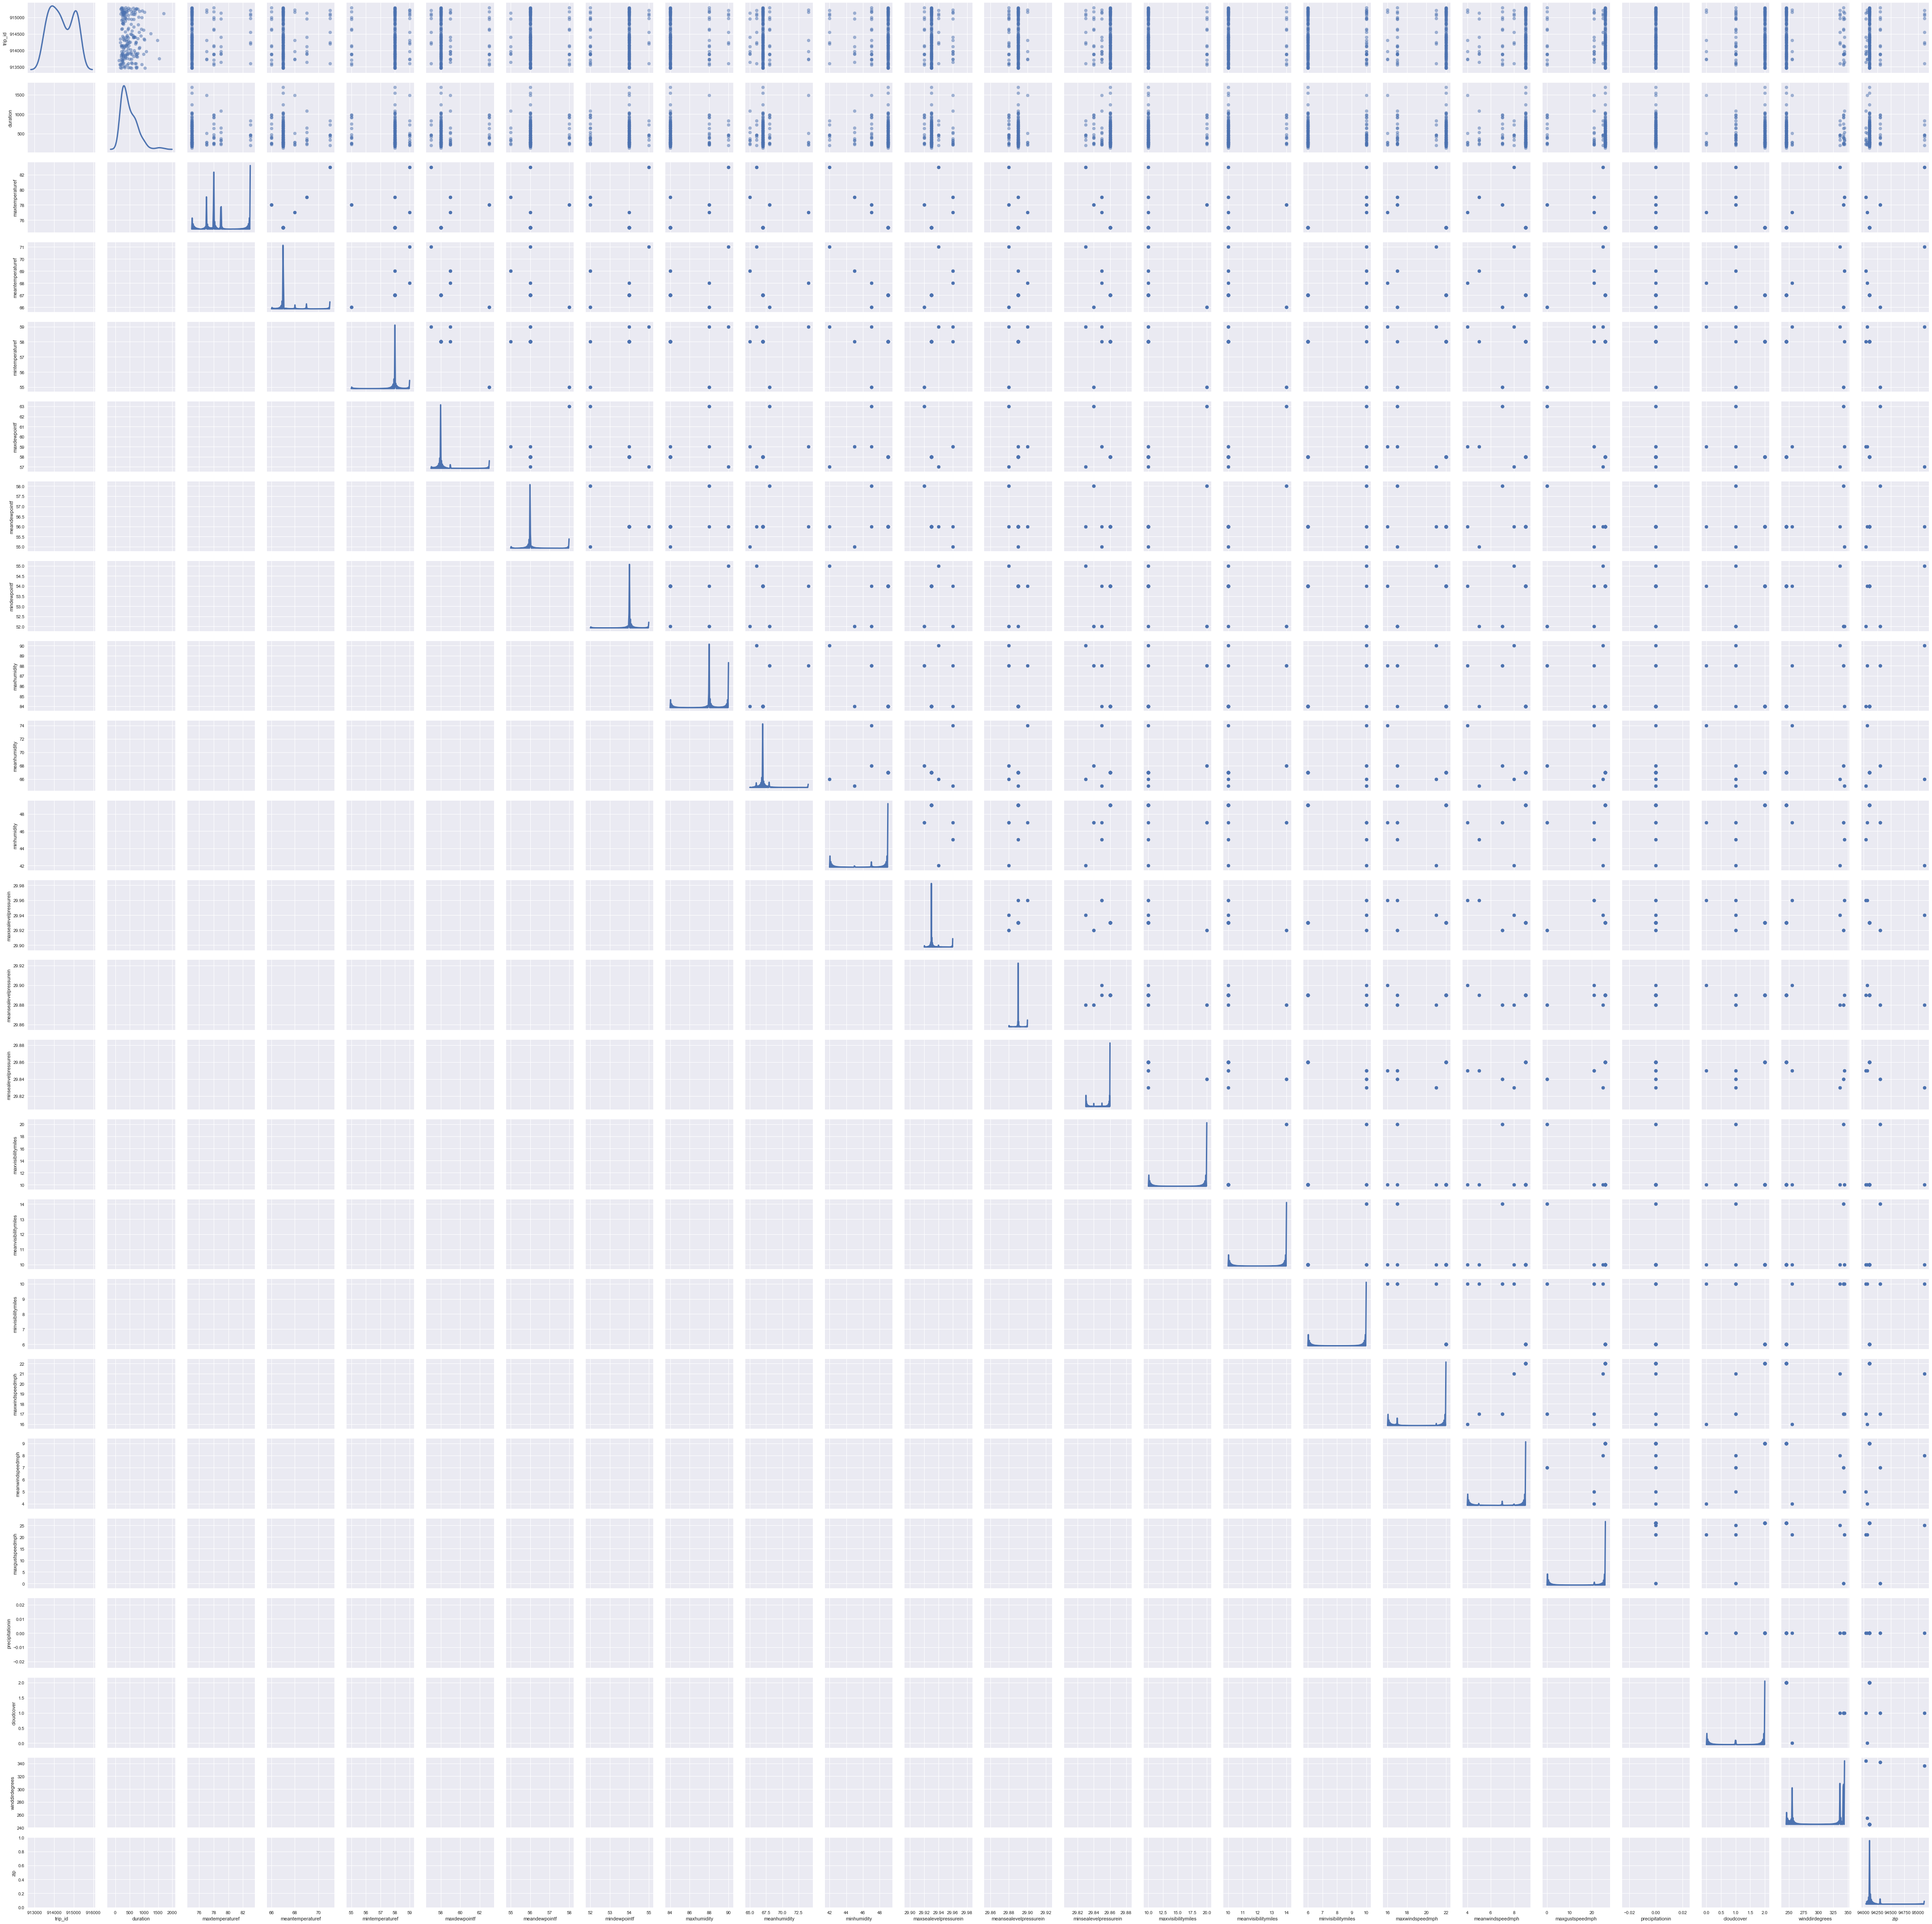

In [102]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [111]:
print(list(df))

['trip_id', 'duration', 'start_date', 'start_station', 'date', 'maxtemperaturef', 'meantemperaturef', 'mintemperaturef', 'maxdewpointf', 'meandewpointf', 'mindewpointf', 'maxhumidity', 'meanhumidity', 'minhumidity', 'maxsealevelpressurein', 'meansealevelpressurein', 'minsealevelpressurein', 'maxvisibilitymiles', 'meanvisibilitymiles', 'minvisibilitymiles', 'maxwindspeedmph', 'meanwindspeedmph', 'maxgustspeedmph', 'precipitationin', 'cloudcover', 'events', 'winddirdegrees', 'zip']


In [113]:
# new vars
df.drop([ 'meantemperaturef', 'maxvisibilitymiles', 'minvisibilitymiles','maxsealevelpressurein'], axis=1)


,trip_id,duration,start_date,start_station,date,maxtemperaturef,mintemperaturef,maxdewpointf,meandewpointf,mindewpointf,...,minsealevelpressurein,meanvisibilitymiles,maxwindspeedmph,meanwindspeedmph,maxgustspeedmph,precipitationin,cloudcover,events,winddirdegrees,zip
0,913465,746,2015-09-01 00:10:00,San Francisco Caltrain 2 (330 Townsend),2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
1,913468,213,2015-09-01 01:29:00,Clay at Battery,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
2,913469,574,2015-09-01 01:33:00,Steuart at Market,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
3,913472,1038,2015-09-01 03:38:00,Townsend at 7th,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
4,913475,174,2015-09-01 04:58:00,2nd at Folsom,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
5,913477,454,2015-09-01 05:38:00,Powell Street BART,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
6,913482,337,2015-09-01 06:02:00,Townsend at 7th,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
7,913483,518,2015-09-01 06:10:00,Townsend at 7th,2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
8,913489,757,2015-09-01 06:21:00,San Francisco Caltrain 2 (330 Townsend),2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107
9,913490,731,2015-09-01 06:22:00,San Francisco Caltrain 2 (330 Townsend),2015-09-01,75.0,58.0,58.0,56.0,54.0,...,29.86,10.0,22.0,9.0,26.0,0.0,2,,245.0,94107


In [26]:
# averagetemp
df['temp_avg']=(df['maxtemperaturef']- df['mintemperaturef']) /2 
df['dewpoint_avg']=(df['maxdewpointf']- df['mindewpointf']) /2 
df['humidity_avg']=(df['maxhumidity']- df['minhumidity']) /2 

In [45]:
le = preprocessing.LabelEncoder()
df['station_encode']=le.fit_transform(df['start_station'])

In [48]:
df['zip_encoded'] = df['zip'].apply(lambda col: le.fit_transform(df['zip']))